In [1]:
%pylab inline
import sys, numpy as np, scipy as sp, matplotlib.pyplot as plt

sys.path.append('../engine')
sys.path.append('..')

from engine import analog_new as analog

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

N = 4
Wn = 2 * np.pi * 8e-3
Rp = 1
Rs = 80

freq_range = 2*pi * np.linspace(0.1e-3, 50e-3, 1000)

    

Populating the interactive namespace from numpy and matplotlib


In [2]:
butter = analog.ButterworthFilter()
cheby1 = analog.ChebyshevIFilter()
cheby2 = analog.ChebyshevIIFilter()
elliptic = analog.EllipticFilter()
bessel = analog.BesselFilter()

for filter_type in [butter, cheby1, cheby2, elliptic, bessel]:
    filter_type.N = N
    filter_type.Wn = Wn
    filter_type.filter_kind = 'lowpass'
    if hasattr(filter_type, 'ripple'):
        filter_type.ripple = Rp
    if hasattr(filter_type, 'stopband_attenuation'):
        filter_type.stopband_attenuation = Rs
    
    filter_type.design()
    filter_type.compute_frequencies(N=freq_range)

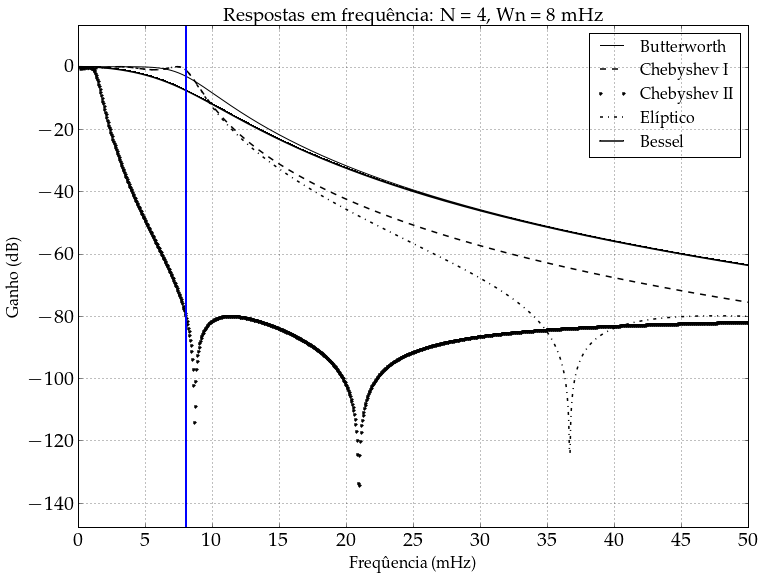

In [5]:
fig = plt.figure(1, figsize=(12, 9))
dashes = ['k-', 'k--', 'k.', 'k-.', 'k-,']

for (pos, filter_type) in enumerate([butter, cheby1, cheby2, elliptic, bessel]):
    plt.plot(filter_type.W / (2 * np.pi) * 1000, 20 * np.log10(abs(filter_type.H)), dashes[pos], linewidth=(1 if pos == 0 else 1.5))
plt.grid()
plt.margins(0, 0.1)

plt.xticks(range(0, 55, 5))
plt.xlabel("Freq\^uencia (mHz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.legend(["Butterworth", "Chebyshev I", "Chebyshev II", "El\\'iptico", "Bessel"], loc='best', fontsize=16)
plt.title("Respostas em frequ\^encia: N = 4, Wn = 8 mHz", fontsize=19)
plt.axvline(8, color='blue', linewidth=2)
plt.savefig('lowpass_analog.eps')
plt.show()